# Logistic Regression Model

## Phase 1: Data Loading, Merging, and Cleaning

In [2]:
import pandas as pd

df_rejected_model = pd.read_csv('../../../data/model_data/Credit_Approval_Rejection_Prediction_Model/modelde_kullanilacak/rejected_approval_model.csv')
df_accepted_model = pd.read_csv('../../../data/model_data/Credit_Approval_Rejection_Prediction_Model/modelde_kullanilacak/accepted_approval_model.csv')

In [3]:
df_rejected_model.head()

,Amount_Requested,Application_Date,DTI,State,Employment_Length,inq_last_6mths,delinq_2yrs,home_ownership,annual_inc,Risk_Score,Approval_Status
0,1000.0,2007-05-26,0.10,NM,4,-1.0,-1.0,UNKNOWN,-1.0,693.0,0
1,1000.0,2007-05-26,0.10,MA,0,-1.0,-1.0,UNKNOWN,-1.0,703.0,0
2,11000.0,2007-05-27,0.10,MD,1,-1.0,-1.0,UNKNOWN,-1.0,715.0,0
3,6000.0,2007-05-27,0.39,MA,0,-1.0,-1.0,UNKNOWN,-1.0,698.0,0
4,1500.0,2007-05-27,0.09,MD,0,-1.0,-1.0,UNKNOWN,-1.0,509.0,0


In [4]:
df_accepted_model.head()

,Amount_Requested,Application_Date,DTI,State,Employment_Length,inq_last_6mths,delinq_2yrs,home_ownership,annual_inc,Risk_Score,Approval_Status
0,3600.0,2015-12-01,5.91,PA,10,1.0,0.0,MORTGAGE,55000.0,677.0,1
1,24700.0,2015-12-01,16.06,SD,10,4.0,1.0,MORTGAGE,65000.0,717.0,1
2,20000.0,2015-12-01,10.78,IL,10,0.0,0.0,MORTGAGE,63000.0,697.0,1
3,35000.0,2015-12-01,17.06,NJ,10,0.0,0.0,MORTGAGE,110000.0,787.0,1
4,10400.0,2015-12-01,25.37,PA,3,3.0,1.0,MORTGAGE,104433.0,697.0,1


In [5]:
df_rejected_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330000 entries, 0 to 6329999
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Amount_Requested   float64
 1   Application_Date   object 
 2   DTI                float64
 3   State              object 
 4   Employment_Length  int64  
 5   inq_last_6mths     float64
 6   delinq_2yrs        float64
 7   home_ownership     object 
 8   annual_inc         float64
 9   Risk_Score         float64
 10  Approval_Status    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 531.2+ MB


In [6]:
df_accepted_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809000 entries, 0 to 1808999
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Amount_Requested   float64
 1   Application_Date   object 
 2   DTI                float64
 3   State              object 
 4   Employment_Length  int64  
 5   inq_last_6mths     float64
 6   delinq_2yrs        float64
 7   home_ownership     object 
 8   annual_inc         float64
 9   Risk_Score         float64
 10  Approval_Status    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 151.8+ MB


In [7]:
df_rejected_model.shape

(6330000, 11)

In [8]:
df_accepted_model.shape

(1809000, 11)

In [9]:
df_rejected_model['Application_Date'] = pd.to_datetime(df_rejected_model['Application_Date'])
display(df_rejected_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330000 entries, 0 to 6329999
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Amount_Requested   float64       
 1   Application_Date   datetime64[ns]
 2   DTI                float64       
 3   State              object        
 4   Employment_Length  int64         
 5   inq_last_6mths     float64       
 6   delinq_2yrs        float64       
 7   home_ownership     object        
 8   annual_inc         float64       
 9   Risk_Score         float64       
 10  Approval_Status    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 531.2+ MB


None

In [10]:
df_accepted_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809000 entries, 0 to 1808999
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Amount_Requested   float64
 1   Application_Date   object 
 2   DTI                float64
 3   State              object 
 4   Employment_Length  int64  
 5   inq_last_6mths     float64
 6   delinq_2yrs        float64
 7   home_ownership     object 
 8   annual_inc         float64
 9   Risk_Score         float64
 10  Approval_Status    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 151.8+ MB


In [11]:
df_accepted_model['Application_Date'] = pd.to_datetime(df_accepted_model['Application_Date'])
display(df_accepted_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809000 entries, 0 to 1808999
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Amount_Requested   float64       
 1   Application_Date   datetime64[ns]
 2   DTI                float64       
 3   State              object        
 4   Employment_Length  int64         
 5   inq_last_6mths     float64       
 6   delinq_2yrs        float64       
 7   home_ownership     object        
 8   annual_inc         float64       
 9   Risk_Score         float64       
 10  Approval_Status    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 151.8+ MB


None

In [12]:
df_combined_model = pd.concat([df_accepted_model, df_rejected_model], ignore_index=True)
display(df_combined_model.shape)
display(df_combined_model.info())

(8139000, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139000 entries, 0 to 8138999
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Amount_Requested   float64       
 1   Application_Date   datetime64[ns]
 2   DTI                float64       
 3   State              object        
 4   Employment_Length  int64         
 5   inq_last_6mths     float64       
 6   delinq_2yrs        float64       
 7   home_ownership     object        
 8   annual_inc         float64       
 9   Risk_Score         float64       
 10  Approval_Status    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 683.1+ MB


None

In [13]:
df_combined_model.head()

,Amount_Requested,Application_Date,DTI,State,Employment_Length,inq_last_6mths,delinq_2yrs,home_ownership,annual_inc,Risk_Score,Approval_Status
0,3600.0,2015-12-01,5.91,PA,10,1.0,0.0,MORTGAGE,55000.0,677.0,1
1,24700.0,2015-12-01,16.06,SD,10,4.0,1.0,MORTGAGE,65000.0,717.0,1
2,20000.0,2015-12-01,10.78,IL,10,0.0,0.0,MORTGAGE,63000.0,697.0,1
3,35000.0,2015-12-01,17.06,NJ,10,0.0,0.0,MORTGAGE,110000.0,787.0,1
4,10400.0,2015-12-01,25.37,PA,3,3.0,1.0,MORTGAGE,104433.0,697.0,1


In [14]:
df_combined_model.shape

(8139000, 11)

In [ ]:
#df_combined_model.to_csv('full_model_data.csv', index=False)
#print("DataFrame exported to 'full_model_data.csv' successfully.")

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Missing_flag + Median Fill = The Most Accurate Strategy

- missing_flag → Enables the model to correctly interpret missing information

- median imputation → Keeps numerical features stable and meaningful

- scaling → Ensures all numerical columns remain balanced


In [15]:
# Added binary flag columns indicating that the –1 values represent actual missing data.
# Missing value flag columns
df_combined_model['inq_last_6mths_missing'] = (df_combined_model['inq_last_6mths'] == -1).astype(int)
df_combined_model['delinq_2yrs_missing'] = (df_combined_model['delinq_2yrs'] == -1).astype(int)
df_combined_model['annual_inc_missing'] = (df_combined_model['annual_inc'] == -1).astype(int)

In [16]:
import numpy as np
# Replaced –1 values with NaN and filled them with the median.
df_combined_model['inq_last_6mths'] = df_combined_model['inq_last_6mths'].replace(-1, np.nan)
df_combined_model['delinq_2yrs'] = df_combined_model['delinq_2yrs'].replace(-1, np.nan)
df_combined_model['annual_inc'] = df_combined_model['annual_inc'].replace(-1, np.nan)

df_combined_model['inq_last_6mths'].fillna(df_combined_model['inq_last_6mths'].median(), inplace=True)
df_combined_model['delinq_2yrs'].fillna(df_combined_model['delinq_2yrs'].median(), inplace=True)
df_combined_model['annual_inc'].fillna(df_combined_model['annual_inc'].median(), inplace=True)


## Encoding Categorical Columns (One-Hot or Ordinal)

In [17]:
# Adjusted the Application_Date format.
df_combined_model['Application_Date'] = pd.to_datetime(df_combined_model['Application_Date'])

df_combined_model['app_year'] = df_combined_model['Application_Date'].dt.year
df_combined_model['app_month'] = df_combined_model['Application_Date'].dt.month
df_combined_model['app_day'] = df_combined_model['Application_Date'].dt.day

In [18]:
# Dropped the old date column.
df_combined_model.drop(columns=['Application_Date'], inplace=True)

In [19]:
# One-Hot Encoding: (State, home_ownership)
df_combined_model = pd.get_dummies(
    df_combined_model,
    columns=['State', 'home_ownership'],
    drop_first=True
)

In [20]:
cols_to_drop = [
    'annual_inc_missing',
    'delinq_2yrs_missing',
    'inq_last_6mths_missing',
    'home_ownership_UNKNOWN',
    'app_day',
    'Risk_Score',
    'home_ownership_MORTGAGE',
    'Employment_Length'
]

df_combined_model = df_combined_model.drop(columns=cols_to_drop, errors='ignore')

In [21]:
df_combined_model.head()

,Amount_Requested,DTI,inq_last_6mths,delinq_2yrs,annual_inc,Approval_Status,app_year,app_month,State_AL,State_AR,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,3600.0,5.91,1.0,0.0,55000.0,1,2015,12,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,16.06,4.0,1.0,65000.0,1,2015,12,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,10.78,0.0,0.0,63000.0,1,2015,12,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35000.0,17.06,0.0,0.0,110000.0,1,2015,12,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,25.37,3.0,1.0,104433.0,1,2015,12,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train/Test Split

In [22]:
# Separated the target variable.
#X = df_combined_model.drop(columns=['Approval_Status'])
#y = df_combined_model['Approval_Status']
X = df_combined_model.drop(columns=['Approval_Status', 'app_year', 'app_month'])
y = df_combined_model['Approval_Status']

In [14]:
X

,Amount_Requested,DTI,inq_last_6mths,delinq_2yrs,annual_inc,State_AL,State_AR,State_AZ,State_CA,State_CO,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,3600.0,5.91,1.0,0.0,55000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24700.0,16.06,4.0,1.0,65000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20000.0,10.78,0.0,0.0,63000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35000.0,17.06,0.0,0.0,110000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10400.0,25.37,3.0,1.0,104433.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8138995,35000.0,0.17,0.0,0.0,65000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8138996,7000.0,0.02,0.0,0.0,65000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8138997,35000.0,0.47,0.0,0.0,65000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8138998,2500.0,0.22,0.0,0.0,65000.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Train/Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y        # Important for preserving class distribution
)


In [24]:
pd.set_option('display.max_rows', None)
print(df_combined_model.corr()['Approval_Status'].sort_values(ascending=False))
df_combined_model.corr()['Approval_Status'].sort_values(ascending=False)

# Calculated correlations and converted them into a DataFrame
#corr_df = df_combined_model.corr()['Approval_Status'].sort_values(ascending=False).reset_index()
#corr_df.columns = ['Feature', 'Correlation_with_Approval_Status']

# Save as CSV
#corr_df.to_csv('Approval_Status_Correlations.csv', index=False)

Approval_Status         1.000000
home_ownership_RENT     0.580048
inq_last_6mths          0.493116
home_ownership_OWN      0.299250
delinq_2yrs             0.298982
annual_inc              0.096024
Amount_Requested        0.053896
DTI                     0.037947
app_month               0.030812
State_CA                0.025543
State_MN                0.015686
State_CO                0.013822
State_NY                0.013200
State_CT                0.011215
State_NJ                0.011215
State_WA                0.009369
State_NV                0.008500
home_ownership_OTHER    0.007647
State_MA                0.007451
State_IL                0.007000
State_WV                0.006952
State_OR                0.006619
State_MD                0.006508
State_AZ                0.006177
State_NH                0.003868
State_DC                0.003007
State_VA                0.003000
State_VT                0.002817
State_WY                0.002696
home_ownership_NONE     0.002271
State_RI  

Approval_Status         1.000000
home_ownership_RENT     0.580048
inq_last_6mths          0.493116
home_ownership_OWN      0.299250
delinq_2yrs             0.298982
annual_inc              0.096024
Amount_Requested        0.053896
DTI                     0.037947
app_month               0.030812
State_CA                0.025543
State_MN                0.015686
State_CO                0.013822
State_NY                0.013200
State_CT                0.011215
State_NJ                0.011215
State_WA                0.009369
State_NV                0.008500
home_ownership_OTHER    0.007647
State_MA                0.007451
State_IL                0.007000
State_WV                0.006952
State_OR                0.006619
State_MD                0.006508
State_AZ                0.006177
State_NH                0.003868
State_DC                0.003007
State_VA                0.003000
State_VT                0.002817
State_WY                0.002696
home_ownership_NONE     0.002271
State_RI  

✔️ Why is stratify important?

Rejected vs. Accepted classes may be imbalanced.
Using stratify = y ensures that both train and test sets contain the same proportion of accepted/rejected cases.

Otherwise:

If the model sees no “accepted” cases in training → it will behave inaccurately

AUC/Accuracy may become misleading

Train/Test distributions will differ → resulting in an inconsistent and unreliable model

-----------

## Scaling

⚠️ Scaling is applied only to numerical columns

Scaling one-hot encoded columns is incorrect.

Therefore:

We will identify the numerical columns

Apply the scaler only to these columns

Missing_flag columns will not be scaled

One-hot encoded columns will not be scaled

--------------------

❌ If scaling is done before the train/test split → this causes data leakage.

✔️ Scaling must be done after the train/test split → this is the correct approach.

🔥 Why don’t we scale before splitting the data?

If scaling is applied before the train/test split:

The scaler sees the mean and standard deviation of the entire dataset (train + test).

Information from the test set leaks into the training process → the model indirectly knows the test statistics.

🔴 This is called data leakage, and it artificially increases model performance.
In real-world deployment, the model will fail.

In [25]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Fit + transform only on the training set
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform only on the test set
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


C:\Users\zeynep\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\zeynep\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500, class_weight='balanced')

In [27]:
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [28]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calculated the metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)  # dict formatında al

# Converted the metrics to a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'ROC-AUC'],
    'Value': [accuracy, f1, roc_auc]
})

# Converted the classification report to a DataFrame
class_report_df = pd.DataFrame(class_report).transpose().reset_index()
class_report_df.rename(columns={'index': 'Class'}, inplace=True)

# Saved as CSV
metrics_df.to_csv('model_metrics.csv', index=False)
class_report_df.to_csv('classification_report.csv', index=False)

In [29]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.969481508784863
F1-Score: 0.9279433735114515
ROC-AUC Score: 0.9880286933814341
[[1258246    7754]
 [  41924  319876]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1266000
           1       0.98      0.88      0.93    361800

    accuracy                           0.97   1627800
   macro avg       0.97      0.94      0.95   1627800
weighted avg       0.97      0.97      0.97   1627800



<Figure size 504x432 with 0 Axes>

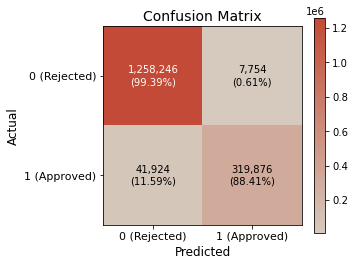

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # <- EKLENDİ
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ["0 (Rejected)", "1 (Approved)"]

# Satır bazında normalize edilmiş yüzde matrisini hesapla
cm_percent = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(7,6))

# Daha küçük boyutlu figure
plt.figure(figsize=(5,4))

# Custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#d5cabd", "#c34a36"])

plt.imshow(cm, cmap=cmap)
plt.title("Confusion Matrix", fontsize=14)
plt.colorbar()

plt.xticks(np.arange(len(labels)), labels, fontsize=11)
plt.yticks(np.arange(len(labels)), labels, fontsize=11)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)

# Hücrelerde hem sayı hem yüzde göster
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        pct = cm_percent[i, j] * 100
        text = f"{count:,}\n({pct:.2f}%)"

        # renk kontrastı
        color = "white" if cm[i, j] > cm.max() / 2 else "black"

        plt.text(j, i, text, ha="center", va="center", color=color, fontsize=10)

plt.tight_layout()
plt.show()

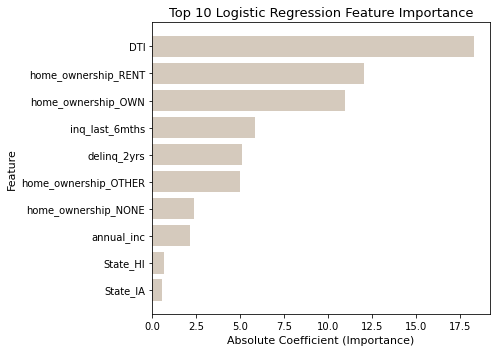

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Logistic Regression model adını kendi modeline göre değiştir
# Örnek: logreg
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(log_reg.coef_[0])
})

# En önemli 10 feature'ı al
top_features = feature_importance.sort_values(by='importance', ascending=True).tail(10)

# Grafik
plt.figure(figsize=(7,5))
plt.barh(top_features['feature'], top_features['importance'], color='#d5cabd')
plt.xlabel("Absolute Coefficient (Importance)", fontsize=11)
plt.ylabel("Feature", fontsize=11)
plt.title("Top 10 Logistic Regression Feature Importance", fontsize=13)
plt.tight_layout()
plt.show()